In [137]:
using Turing, StatsFuns, Distributions
using IJulia
IJulia.installkernel("Julia nodeps", "--depwarn=no")

# simulation data
function respGen(N, J)
    θ = rand(Normal(), N)
    a = rand(LogNormal(), J)
    b = rand(Uniform(-2, 2), J)
    resp = zeros(Int64, N, J)
    for i in 1:N
        for j in 1:J
            resp[i,j] = rand(Uniform(0.0,1.0),1)[1] < StatsFuns.logistic(a[j]*(θ[i]-b[j])) ? 1 : 0
        end
    end
    return resp, θ, a, b
end

@model irt2pl(data,  N, J) = begin
    # ここ FloatじゃなくてRealにする必要がある→https://github.com/TuringLang/Turing.jl/issues/716
    θ = Vector{Real}(undef, N)
    α = β = Vector{Real}(undef, J)
    # assign distributon to each element
    for i = 1:N
        θ[i] ~ Normal(0, 1)
    end
    for i = 1:J
        α[i] ~ LogNormal(0, 1)
        β[i] ~ Normal(0, 2)
    end
    for i = 1:N
       for j = 1:J
           p = logistic(α[j]*(θ[i]-β[j]))
           data[i,j] ~ Bernoulli(p)
       end
    end
end

data, θ, a, b = respGen(200, 20);
N, J = size(data)
iterations = 100
num_chains = 1
#Turing.setadbackend(:forward_diff)
chain_HMCDA = sample(irt2pl(data, N, J), HMCDA(0.15, 0.65), iterations); # Fast!!

┌ Info: Installing Julia nodeps kernelspec in /Users/yukihiro-su/Library/Jupyter/kernels/julia-nodeps-1.5
└ @ IJulia /Users/yukihiro-su/.julia/packages/IJulia/e8kqU/deps/kspec.jl:94
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/yukihiro-su/.julia/packages/Turing/YGtAo/src/inference/hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/yukihiro-su/.julia/packages/AdvancedHMC/bv9VV/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/yukihiro-su/.julia/packages/AdvancedHMC/bv9VV/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/yukihiro-su/.julia/packages/AdvancedHMC/bv9VV/src/hamiltonian.jl:47

In [138]:
#sumstats = summarize(chain_HMCDA, mean, std)
sumstats = mean(group(chain_HMCDA, :θ))

Mean
  parameters      mean 
      Symbol   Float64 

        θ[1]    1.2249
        θ[2]    0.7376
        θ[3]   -0.0481
        θ[4]    0.5812
        θ[5]   -0.6038
        θ[6]    1.6103
        θ[7]   -1.0512
        θ[8]   -0.6955
        θ[9]   -1.3337
       θ[10]   -0.3236
       θ[11]   -1.1303
       θ[12]    1.0581
       θ[13]    0.5245
       θ[14]   -0.1733
       θ[15]    1.5082
       θ[16]   -0.0619
       θ[17]   -0.3892
       θ[18]    0.8014
       θ[19]    1.0527
       θ[20]    1.6701
       θ[21]   -0.0553
       θ[22]    1.5363
       θ[23]    0.6374
      ⋮           ⋮
        177 rows omitted


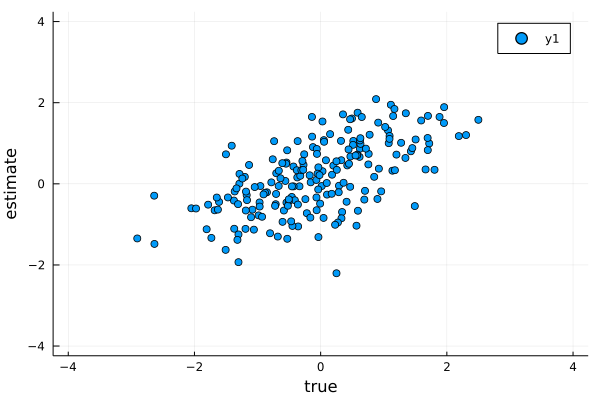

In [139]:
# visualize
using Plots
using StatsPlots
scatter(θ, sumstats[:,:mean], ylims = [-4,4], xlims = [-4,4], xlabel = "true", ylabel = "estimate")

In [50]:
using Turing
using StatsPlots

# Define a simple Normal model with unknown mean and variance.
@model function gdemo(x, y)
  s² ~ InverseGamma(2, 3)
  m ~ Normal(0, sqrt(s²))
  x ~ Normal(m, sqrt(s²))
  y ~ Normal(m, sqrt(s²))
end

#  Run sampler, collect results
chn = sample(gdemo(1.5, 2), HMC(0.1, 5), 1000)

# Summarise results
describe(chn)

# Plot and save results
p = plot(chn)
savefig("gdemo-plot.png")